In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/large_data.csv')

# Check for missing values
print(df.isnull().sum())

# Encode 'Diet_Type' and other categorical features
le = LabelEncoder()
df['Diet_Type_encoded'] = le.fit_transform(df['Diet_Type'])

# Features (X) and Target (y)
X = df[['Electricity_Usage_kWh', 'Gas_Usage_kWh', 'Car_Usage_km', 'Flight_Trips_per_year',
        'Diet_Type_encoded', 'Waste_Produced_kg', 'Recycling_Rate', 'Cycling_Habit', 'Public_Transport_Habit']]
y = df['Carbon_Footprint_kgCO2']

# Split the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the Train and Test sets
print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")


Electricity_Usage_kWh     0
Gas_Usage_kWh             0
Car_Usage_km              0
Flight_Trips_per_year     0
Diet_Type                 0
Waste_Produced_kg         0
Recycling_Rate            0
Cycling_Habit             0
Public_Transport_Habit    0
Carbon_Footprint_kgCO2    0
dtype: int64
Training Set Shape: (4000, 9)
Test Set Shape: (1000, 9)


In [ ]:
# Instantiate the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Evaluation Metrics:
Mean Absolute Error (MAE): 78.70
Mean Squared Error (MSE): 9874.45
R² Score: 0.97
Root Mean Squared Error (RMSE): 99.37


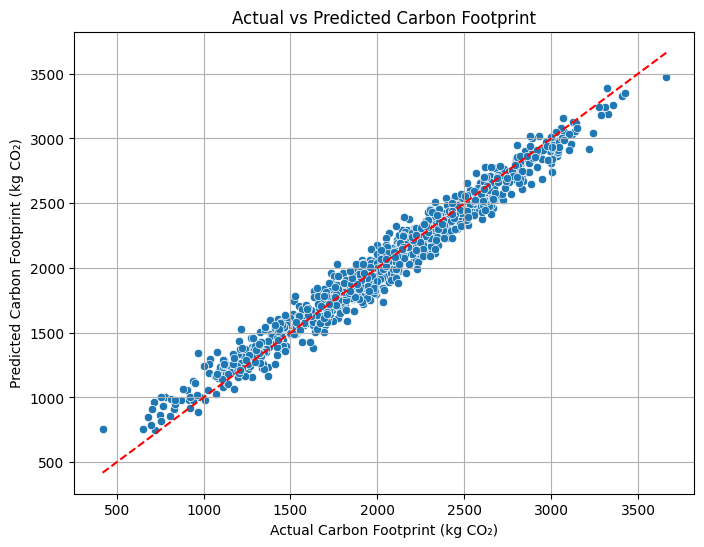

In [ ]:
# Visualize the model performance: Actual vs Predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Carbon Footprint (kg CO₂)')
plt.ylabel('Predicted Carbon Footprint (kg CO₂)')
plt.title('Actual vs Predicted Carbon Footprint')
plt.grid(True)
plt.show()

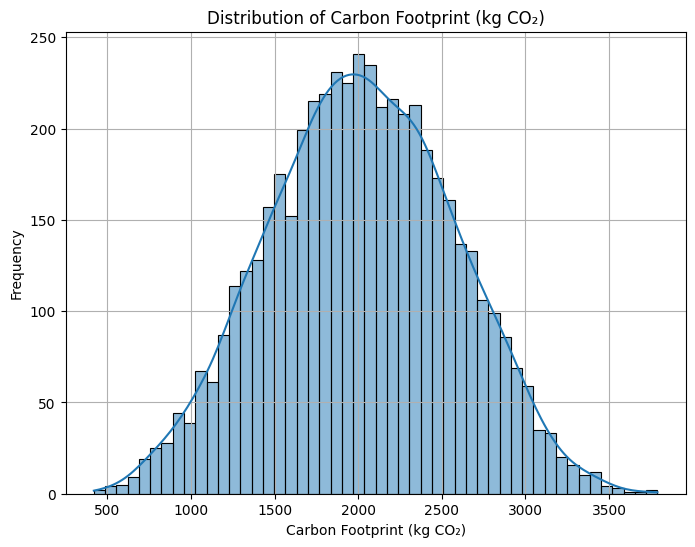

In [ ]:
# Visualize the distribution of the target variable 'Carbon_Footprint_kgCO2'
plt.figure(figsize=(8,6))
sns.histplot(df['Carbon_Footprint_kgCO2'], bins=50, kde=True)
plt.title('Distribution of Carbon Footprint (kg CO₂)')
plt.xlabel('Carbon Footprint (kg CO₂)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()